<a href="https://colab.research.google.com/github/anvesha-prashi/PaisaBazaar-EDA/blob/main/EDA_Capstone_PaisaBazaar_Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕵️ **<u>Fraud Analysis for PaisaBazaar</u>**
EDA of Credit Scores based on customer data for detecting potential risks and mitigating them.

Contributed by - Anvesha Bhatore

# 📝 <u> **Summary** </u>
This EDA is for PaisaBazaar company to help them enhance their credit assessment process and reduce risks of potential fraud and default. The dataset includes many variables associated with the customer like annual income, outstanding debt amount, delays from due date, number of credit card enquiries, payment behaviour, credit scores and many other.

This EDA will focus on the credit score and explore the features which have direct/indirect relationship with it.
This will help in forming a general idea of probable outcome given certain data of a potential customer. By identifying deviations from the typical behaviour we can eliminate the anomalies and have the dataset cleaned for better predictions and to improve future fraud detection models.

# **🎯<u>Problem Statement</u>**
1. Analyse the dataset and identify which features separate the credit scores classes.
2. Identify redundancies/outliers/broken features.
3. Understand distributions related/dependent on credit score.

So, every plot should help in answering -
"Does this feature/relationship affect credit score?"

# 🗂️ **Know your data**

## Importing Libaries

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Loading the dataset into DataFrame

In [174]:
sheet_id = "16YPPS76sdTNghDJ01zbsKmIZSpSwxD8Nd1FLGBdrwnM"  # --> Sheet ID from URL of the sheet.
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

In [175]:
df = pd.read_csv(url)  # --> converting that list to dataframe

In [176]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,1006,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,1006,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.27,4,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,1006,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,1006,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,1006,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.27,4,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [177]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,50999,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,50999,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,50999,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",27,6,11.5,3,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,50999,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6,11.5,3,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,50999,8,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3,Good,502.38,34.192463,382,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


## General Information of dataset

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [179]:
# all important computations on numeric columns
df.describe() # -- almost all values are looking normal, not too absurd.

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [180]:
# important computations on categorical/non-numeric columns
df.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


In [181]:
df.isnull().sum() # --> No null values

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [182]:
df.duplicated().sum()  # --> No duplicate rows

np.int64(0)

In [183]:
for i in ['missing', 'null', 'miss', 'Not available']:
  df.replace({i:np.nan}, inplace=True)
df.isnull().any().sum() # ---> 0, no null values

np.int64(0)

In [184]:
# printing the column names type wise
print(df.select_dtypes(include='object').columns.to_list())
print('\n')
print(df.select_dtypes(include=('int', 'float')).columns.to_list())

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [185]:
df['Customer_ID'].unique().size

12500

In [186]:
# checking unique values of credit scores
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


## ❗️ Key Data Facts

The original dataset contains 28 columns out of which there are
- 21 Numerical columns
- 7 Categorical columns.


---


- The dataset total contains 100000 entries out which the entries with unique customer ID are 12500.

- The original dataset has no missing or null values. The dataset does not contain any duplicate rows either.

- All major computational values across numerical columns seem normal, nothing very anomalous.

- Credit Score has 3 categories - Standard, Poor and Good, with 'Standard' having the most count.


---

#🧮 **Data Wrangling**

In [187]:
# Standardizing column names to all lowercase and without space.
df.columns = df.columns.str.strip().str.replace(" ","_").str.lower()
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [188]:
# in case of aggregating categorical column, choose the one with most count and return the value.

def most_common(rating_c):
  return rating_c.value_counts().idxmax()

In [189]:
# New Dataframe of major numerical columns with only unique customer IDs

df_numerical = df.groupby('customer_id')[['age','annual_income','num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries','outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age','total_emi_per_month',
       'amount_invested_monthly','monthly_balance']].median().reset_index()   # ---> taking median instead of mean to avoid discrepancy if skewed distribution present

In [190]:
df_numerical.head()

,customer_id,age,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,1006,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,5.0,11.27,4.0,809.98,27.042439,268.5,49.574949,21.465380,321.851976
1,1007,28.0,34847.84,2.0,4.0,6.0,1.0,3.0,2.0,5.42,2.0,605.03,33.302980,322.5,18.816215,39.684018,466.071350
2,1008,34.0,143162.64,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,1303.01,38.221688,216.5,246.992320,168.413703,929.708082
3,1009,55.0,30689.89,2.0,5.0,4.0,1.0,5.0,6.0,1.99,4.0,632.46,29.873293,210.5,16.415452,29.393311,410.689467
4,1011,21.0,35547.71,7.0,5.0,5.0,0.0,5.0,15.0,2.58,4.0,943.86,27.972657,371.5,0.000000,37.643638,416.432183


In [191]:
# New Dataframe of major categorical columns with only unique customer IDs

df_categorical = df.groupby('customer_id')[['name','occupation', 'payment_of_min_amount', 'credit_mix', 'credit_score']].agg(most_common).reset_index()

In [192]:
# Merging above two to have single Dataframe with only unique Customer IDs

df1 = pd.merge(df_numerical, df_categorical, on='customer_id')

In [194]:
# creating new column to identify high risk categories

df1['debt_burden_ratio'] = df1['total_emi_per_month'] / (df1['annual_income'] / 12)

In [196]:
df1.head()

,customer_id,age,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,name,occupation,payment_of_min_amount,credit_mix,credit_score,debt_burden_ratio
0,1006,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,5.0,11.27,4.0,809.98,27.042439,268.5,49.574949,21.465380,321.851976,Aaron Maashoh,Scientist,No,Good,Good,0.031124
1,1007,28.0,34847.84,2.0,4.0,6.0,1.0,3.0,2.0,5.42,2.0,605.03,33.302980,322.5,18.816215,39.684018,466.071350,Rick Rothackerj,Teacher,No,Good,Good,0.006479
2,1008,34.0,143162.64,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,1303.01,38.221688,216.5,246.992320,168.413703,929.708082,Langep,Engineer,No,Good,Good,0.020703
3,1009,55.0,30689.89,2.0,5.0,4.0,1.0,5.0,6.0,1.99,4.0,632.46,29.873293,210.5,16.415452,29.393311,410.689467,Jasond,Entrepreneur,No,Good,Standard,0.006419
4,1011,21.0,35547.71,7.0,5.0,5.0,0.0,5.0,15.0,2.58,4.0,943.86,27.972657,371.5,0.000000,37.643638,416.432183,Deepaa,Developer,Yes,Standard,Standard,0.000000


In [197]:
df1.shape

(12500, 23)

# 📊 **EDA with visualization**

In [198]:
#setting theme for visualization
sns.set_theme(style="whitegrid", palette="pastel", context='notebook')

## 1️⃣ **Univariate Analysis**

### <u>Numerical Columns</u>

In [199]:
df_numerical.columns

Index(['customer_id', 'age', 'annual_income', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance'],
      dtype='object')

In [200]:
# important numerical columns to be analysed based on the context of credit score evaluation.
imp_ncolumns = ['num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age','debt_burden_ratio']

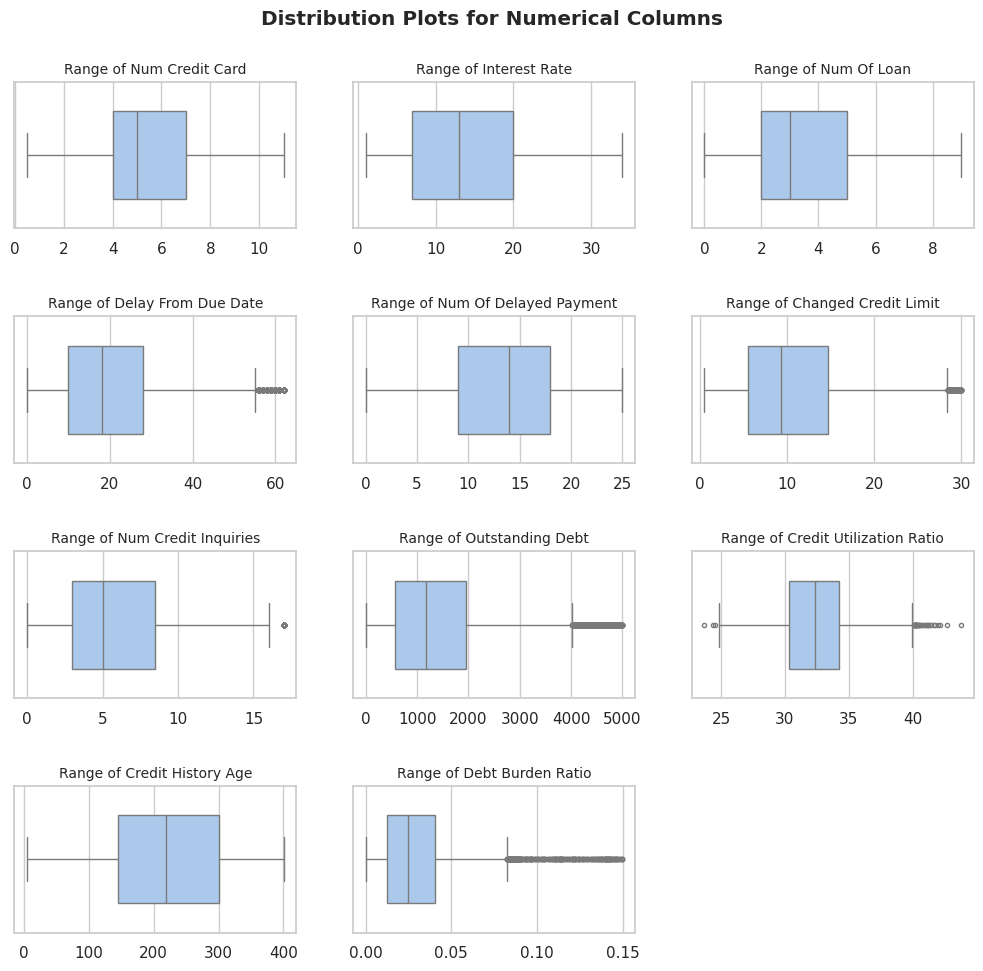

In [201]:
#========Distribution Plots for Numerical Columns========#

fig, axes = plt.subplots(5,3,figsize=(10,12))
axes = axes.flatten()

for i, col in enumerate(imp_ncolumns):
  # print(f"\nPlotting distribution for - {col}\n")
  sns.boxplot(x=df1[col], ax = axes[i], fliersize=3, width=.6)
  title = col.replace("_"," ").title()
  axes[i].set_title(f"Range of {title}", pad=6, fontsize='10')
  axes[i].set(xlabel=None)

  if col == "annual_income":
    axes[i].set_xscale("log")  # --> setting logscale for annual income to fit in xticks and not overlap

plt.suptitle("Distribution Plots for Numerical Columns", fontweight='bold')

for j in range(i + 1, len(axes)):   # --> clearing empty axes for better visual
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=.6, wspace=.2, top=.92)
plt.show()

In [202]:
# checking the maximum of debt-burden ratio.
df1['debt_burden_ratio'].max()

0.1498900995466993

ℹ️ ***Box Plot*** of numerical columns show the possible outliers.

Important variables with outliers are -
1. Debt Burden Ratio --> Higher value usually reflects credit dependence and risk.
3. Outstanding Debt
4. Credit Utilization Ratio --> higher ratio indicates reliance on credit, signals risk, affects credit score.
5. Delay from Due Date  --> Larger delays suggests risks on payments.
6. Changed Credit Limit

Also, credit scores can be majorily affected by -
1. Credit History Age  ---> positively affects the credit score
2. Num of Credit Inquiries ---> Showing Credit hungriness
3. Num of Delayed Payment ---> Reduces credit score

‼️A new column i.e. **Debt Burden Ratio** is useful in identifying high risk individuals.
- The **maximum value is 0.14** which is very conservative reflecting the fact that no customer is having high debt burden out of average monthly income.

Need further analysis on above important variables for understanding deviations and possible correlation with credit score.

---

### <u>Categorical Columns</u>

In [203]:
# removing name column from categorical columns list to analyse
imp_catcolumns = df_categorical.select_dtypes(include='object').columns.to_list()
imp_catcolumns.remove('name')
imp_catcolumns

['occupation', 'payment_of_min_amount', 'credit_mix', 'credit_score']

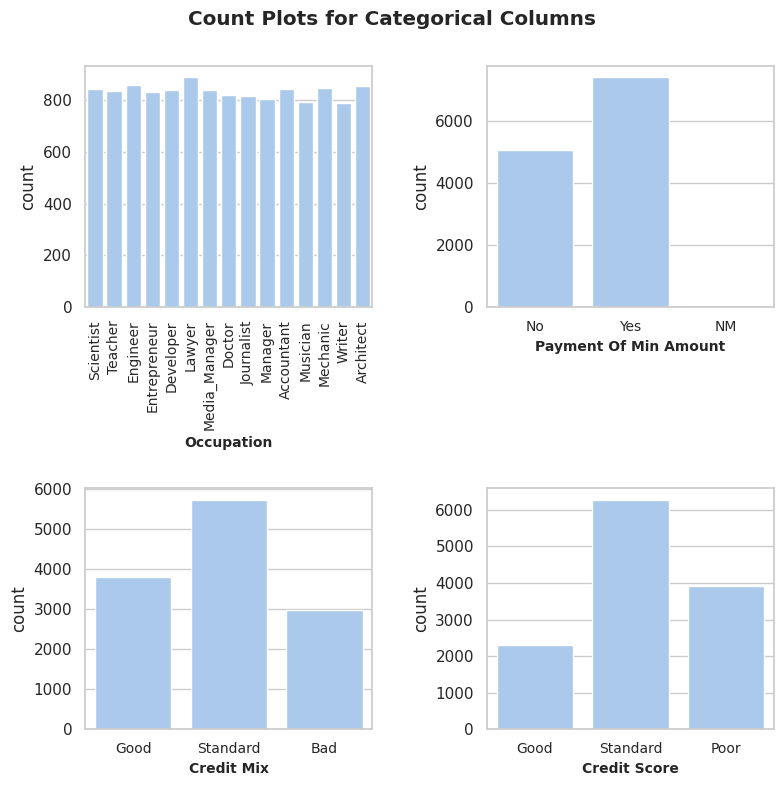

In [204]:
# ========Distribution Plots for Categorical Columns======== #

fig, axes = plt.subplots(2,2,figsize=(8,8))
axes = axes.flatten()

for i, col in enumerate(imp_catcolumns):
  sns.countplot(x=df1[col], ax = axes[i])
  xname = col.replace("_"," ").title()
  axes[i].set_xlabel(xname, fontweight='bold', fontsize=10)
  axes[i].tick_params(axis="x", labelsize=10)

  if df1[col].nunique() > 5:
        axes[i].tick_params(axis="x", rotation=90)

plt.suptitle("Count Plots for Categorical Columns",fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(hspace=.75, wspace=0.4, top=0.91)
plt.show()

ℹ️ ***Countplots*** for categorical distributions to get the idea if there are values which are having abnormal proportions and if so, look into it further.

1. The Occupation distribution is almost even.
2. Credit Scores have greater proportion of 'Standard' rating.
3. Most Credit Mix belong to 'Standard Category'.
4. Payment of Min Amount has higher proportion which suggests more customers just pay the minimum amount only.

---

## 2️⃣ **Bivariate Analysis**

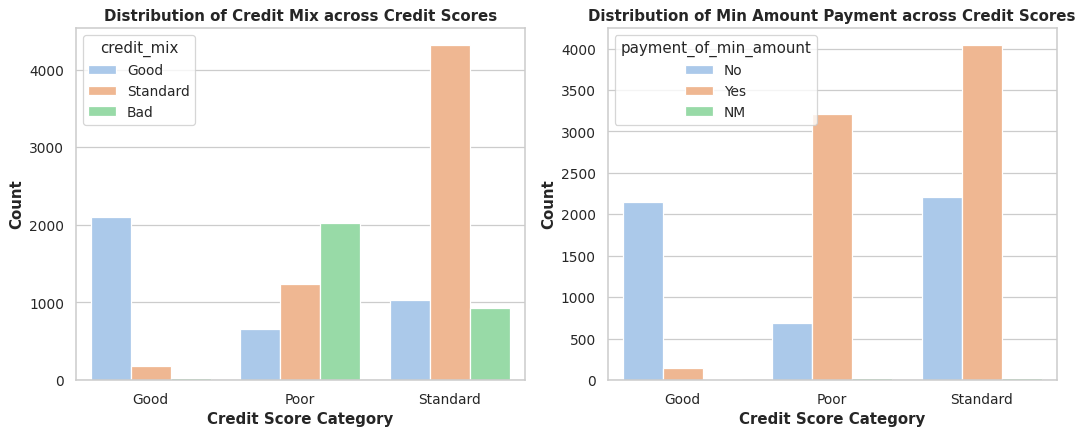

In [205]:
# ====== Distribution of Credit Mix and Minimum Amount Payment across Credit Scores ======= #
fix, axes = plt.subplots(1,2,figsize=(12,5), dpi=90)
sns.countplot(data=df1.sort_values(by='credit_score'), x='credit_score', hue='credit_mix', ax=axes[0])
axes[0].set_title("Distribution of Credit Mix across Credit Scores", fontweight='bold')
axes[0].set_xlabel("Credit Score Category", fontweight='bold')
axes[0].set_ylabel("Count", fontweight='bold')

sns.countplot(data=df1.sort_values(by='credit_score'), x='credit_score', hue='payment_of_min_amount', ax=axes[1])
axes[1].set_title("Distribution of Min Amount Payment across Credit Scores", fontweight='bold')
axes[1].set_xlabel("Credit Score Category", fontweight='bold')
axes[1].set_ylabel("Count", fontweight='bold')

plt.tight_layout()
plt.show()  # ---> Clearly shows bad credit mix -> not good credit score

👆 Above ***grouped barplots*** were used to visualize the relationship of credit score with credit mix and payment of min amount by customers.

1. The barplot shows that almost all customers who have good credit score also have good credit mix.
2. Customers with bad credit mix are mostly having credit score poor or standard.
3. Customers who only pay minimum amount tend to have lower credit scores.

---

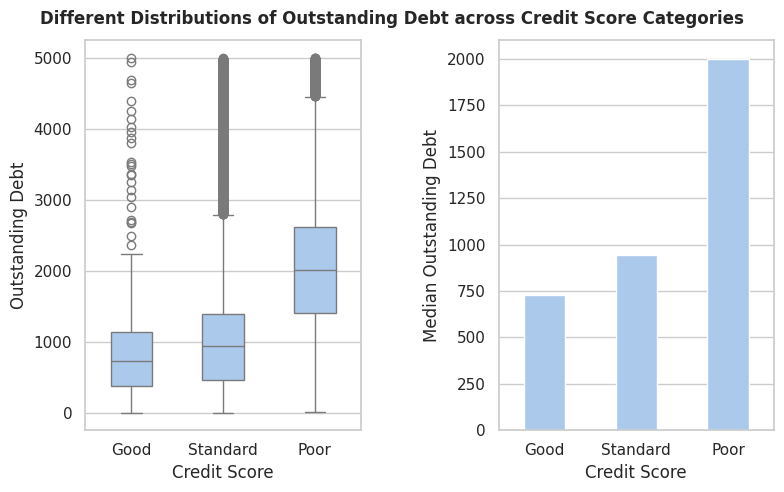

In [206]:
fig, axes = plt.subplots(1,2,figsize=(8,5),dpi=100)
sns.boxplot(data=df1, x='credit_score', y='outstanding_debt', ax=axes[0], width=.45)
axes[0].set_xlabel("Credit Score")
axes[0].set_ylabel("Outstanding Debt")

# Median is used for barplot to reduce the effect of extreme but valid values which are common in financial data.
sns.barplot(data=df1, x='credit_score', y='outstanding_debt', ax=axes[1], estimator=np.median, errorbar=None, width=.45)
axes[1].set_xlabel("Credit Score")
axes[1].set_ylabel("Median Outstanding Debt")


plt.suptitle("Different Distributions of Outstanding Debt across Credit Score Categories", fontweight='bold',fontsize=12)
plt.tight_layout()
plt.subplots_adjust(hspace=.6, wspace=.5, top=.92)
plt.show()


👆The typical (median) outstanding debt decreases as credit score improves, indicating that higher-credit-score customers generally carry lower debt obligations.
- ***Box plot*** shows extreme values across all credit score categories.
- Median ratio suggests inverse relationship that is not driven by extreme values.

---

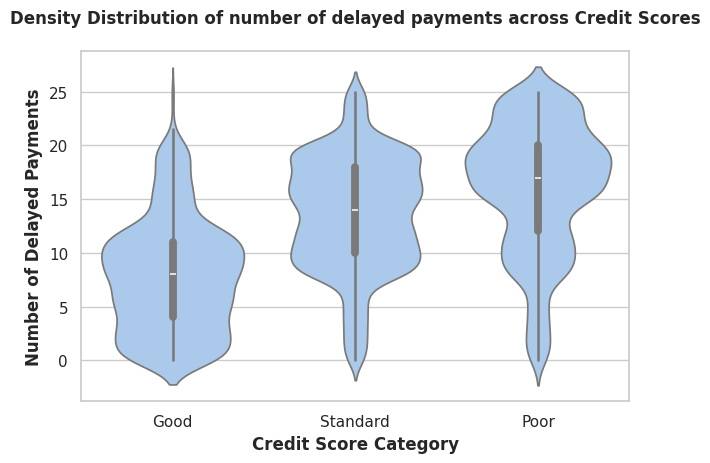

In [207]:
# ===== Distribution and density of number of delayed payments of customers across different credit scores ===== #
plt.figure(dpi=100)

sns.violinplot(data=df1, x='credit_score', y='num_of_delayed_payment')
plt.title("Density Distribution of number of delayed payments across Credit Scores", fontweight='bold', pad=20)
plt.xlabel("Credit Score Category",fontweight='bold')
plt.ylabel("Number of Delayed Payments",fontweight='bold')

plt.tight_layout()
plt.show()


👆 Above Chart establishes these facts-
- Lower credit score categories exhibit higher medians of delayed payments.
- Density of higher number of delayed payments is more in customers with poor credit scores.
- Customers with good credit scores generally pay with lesser delays than customers with poor credit scores.

---

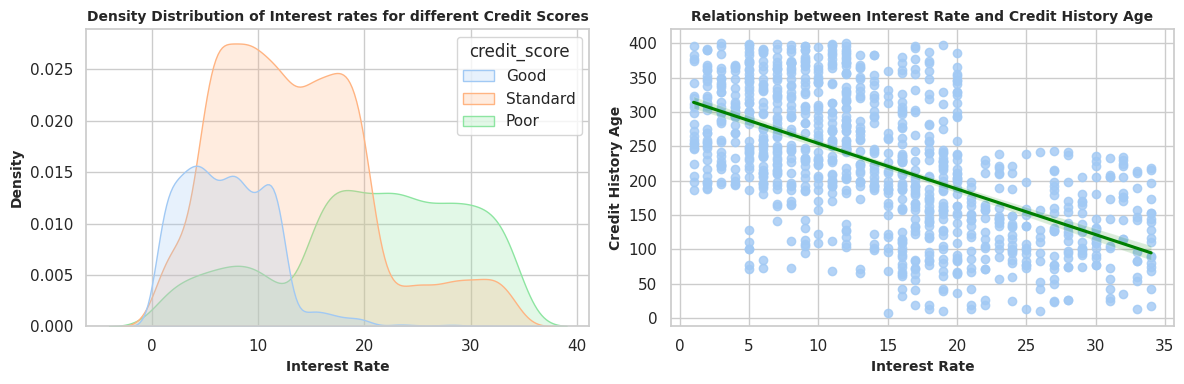

In [208]:
# ==== Distribution of Interest Rates across different credit score categories ==== #

fig, axes = plt.subplots(1,2, figsize=(12, 4), dpi=100)
sns.kdeplot(data=df1, x='interest_rate', hue='credit_score', fill=True, ax=axes[0])
axes[0].set_title("Density Distribution of Interest rates for different Credit Scores", fontweight='bold', fontsize=10)
axes[0].set_xlabel("Interest Rate",fontweight='bold',fontsize=10)
axes[0].set_ylabel("Density",fontweight='bold',fontsize=10)

sns.regplot(data=sample, y='credit_history_age', x='interest_rate', ax=axes[1], line_kws={"color": "green"})
axes[1].set_title("Relationship between Interest Rate and Credit History Age", fontweight='bold',fontsize=10)
axes[1].set_xlabel("Interest Rate",fontweight='bold',fontsize=10)
axes[1].set_ylabel("Credit History Age",fontweight='bold',fontsize=10)

plt.subplots_adjust(wspace=.9)
plt.tight_layout()
plt.show()

👆 The ***KDE plot*** above shows the distribution of interest rates of customers.
- Customers with good credit scores usually have lower interest rates.
- Customers with poor credit scores have wider interest rates range, but among them, there are more customers with higher interest rates.

👆 The ***Reg Plot*** above depicts an inverse relationship between interest rates and credit history age. Customers with higher interest rates are the ones generally with less credit history.

💡 So we can form an idea that customers who have higher interest rates as well as customers who have less credit history age, tend to have poor credit scores.

---

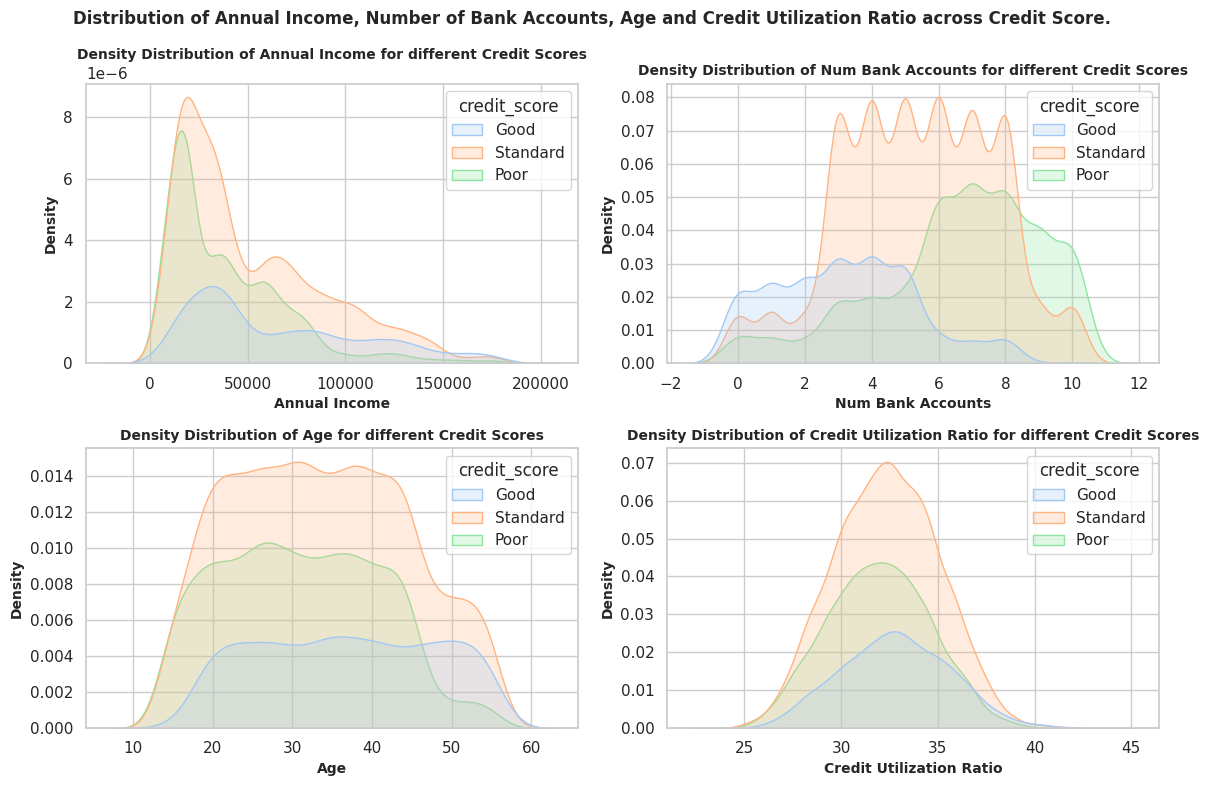

In [209]:
# ==== Distribution of weak features across credit scores ==== #
fig,axes = plt.subplots(2,2,figsize=(12,8))
axes=axes.flatten()
cols_to_plot = ['annual_income','num_bank_accounts', 'age', 'credit_utilization_ratio']

for ax, col in zip(axes,cols_to_plot):
  title = col.replace("_", " ").title()
  sns.kdeplot(data=df1, x=col, hue='credit_score', fill=True, ax=ax)
  ax.set_title(f"Density Distribution of {title} for different Credit Scores", fontweight='bold', fontsize=10)
  ax.set_xlabel(title,fontweight='bold',fontsize=10)
  ax.set_ylabel("Density",fontweight='bold',fontsize=10)

plt.subplots_adjust(wspace=.9)
plt.suptitle("Distribution of Annual Income, Number of Bank Accounts, Age and Credit Utilization Ratio across Credit Score.", fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

👆🤨 Why these plots?
Features like - Annual Income, Number of Bank Accounts, Age and Credit Utilization Ratio are weak features in the dataset, which do not suggest any strong correlation with credit score.
- ***Credit Utilization Ratio*** is generally a strong feature but in this dataset, it has normal distribution with conservative mean value.
- Most categories of credit scores are overlapping for range of values in each feature.
- We can deprioritise them.

---


## 3️⃣ **Multivariate Analysis**

In [210]:
# sample data from new dataframe for quicker processing.

sample = df1.sample(1000, random_state=33)

We have established strong features -
1. Interest Rates
2. Credit History Age
3. Number of Delayed Payments
4. Credit Mix
5. Payment of Minumum Amount

Let's now establish more correlations with features like -
1. Outstanding Debt
2. Number of credit inquiries
3. Changed credit limit
4. Delays from due date
5. Number of loan

---



<Figure size 640x480 with 0 Axes>

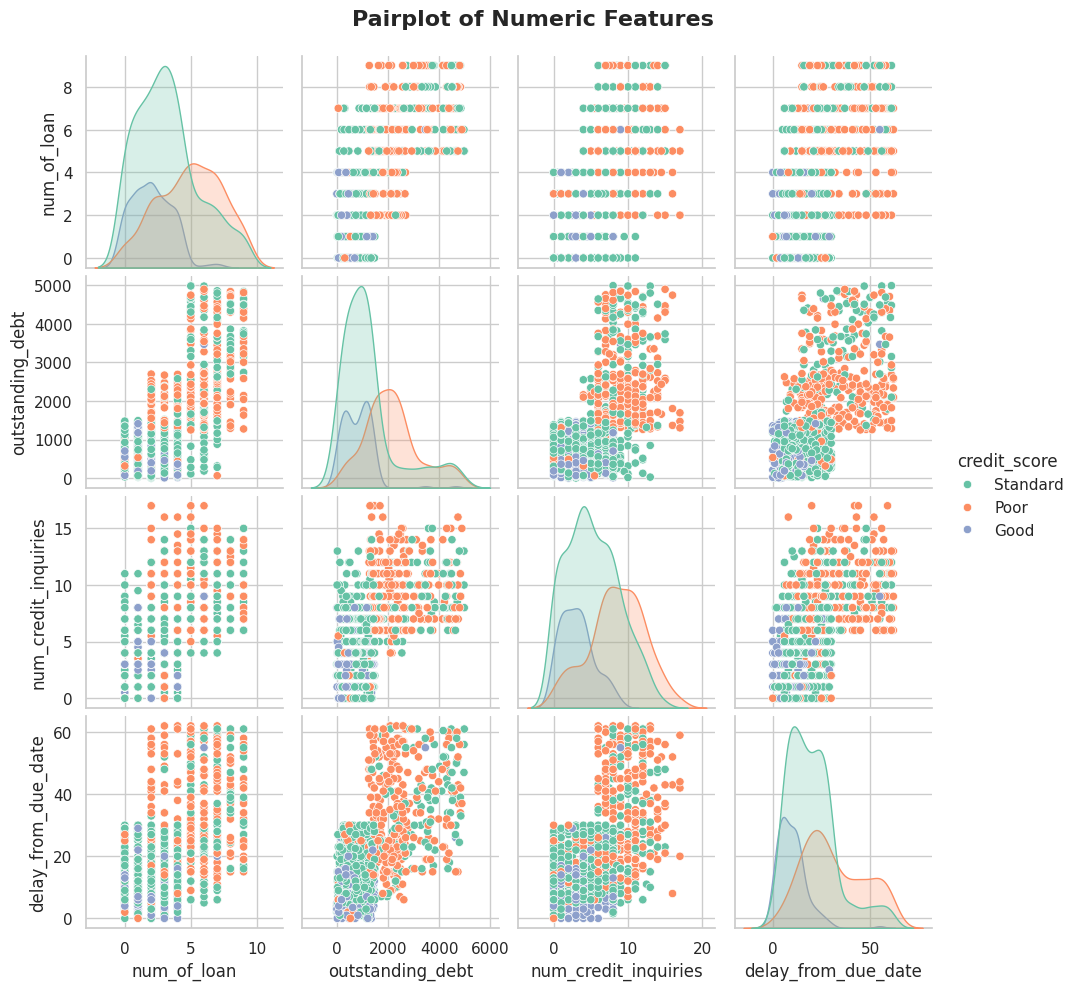

In [211]:
# ==== Pairplot of Number of loans, Outstanding Debt, Number of credit inquiries and Delays from Due date by Credit Score ==== #

plt.figure(dpi=100)

g = sns.pairplot(sample[['num_of_loan','outstanding_debt','num_credit_inquiries','credit_score', 'delay_from_due_date']],
             hue='credit_score', palette='Set2',
             diag_kind='kde',
             height=2.4,
             aspect=1)
g.fig.suptitle("Pairplot of Numeric Features", y=1.03, fontsize=16, fontweight='bold')

plt.show()

👆 Above plot shows that higher the values of these features, lower the credit score.
- Credit Score of 'Standard' rating pervades all ranges.
- 'Good' credit score customers have generally lower value of the numeric features plotted in above chart.

---

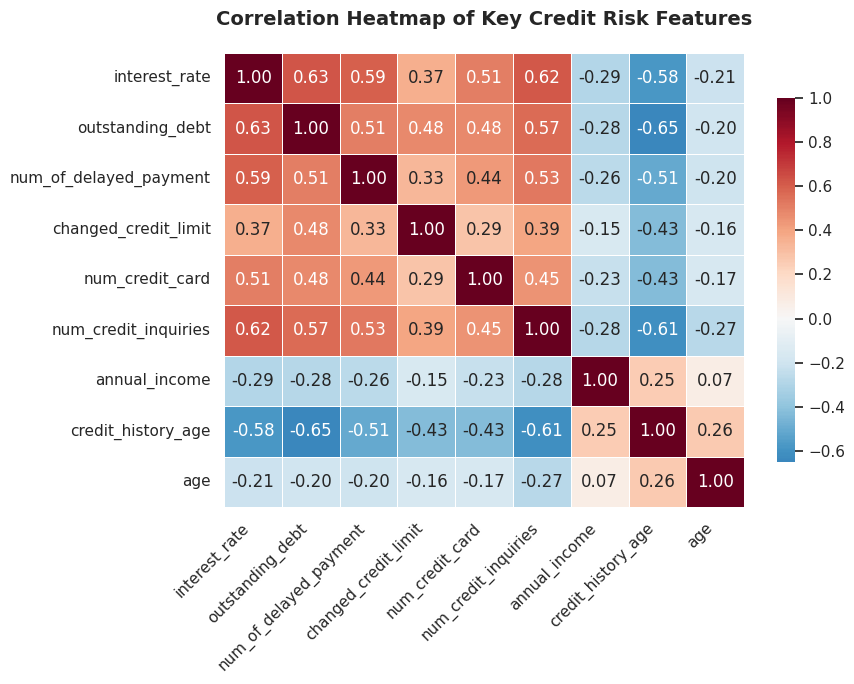

In [212]:
# ==== Heatmap to further establish if there exists any strong correlation between features ==== #

plt.figure(figsize=(9, 7))
_corr = sample[['interest_rate','outstanding_debt',
             'num_of_delayed_payment', 'changed_credit_limit',
             'num_credit_card', 'num_credit_inquiries',
             'annual_income','credit_history_age', 'age',
             ]].corr(method='pearson')

sns.heatmap(
    _corr,
    annot=True,              # show correlation values
    fmt=".2f",               # 2 decimal places
    cmap="RdBu_r",            # diverging colormap (best for correlations)
    center=0,                # center at zero
    linewidths=0.5,          # grid lines
    cbar_kws={"shrink": 0.8} # nicer colorbar
)


plt.title("Correlation Heatmap of Key Credit Risk Features", fontsize=14, fontweight='bold',pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


👆 Heat Map suggests that there are some features that have strong correlation and hence redundacies can be reduced.
- But most of the features do not have strong linear correlation. This was evident from all the above EDA where most of the categories were overlapping.
- The absence of very strong correlations across all variables highlights the complexity of credit behavior and justifies further modeling approaches rather than rule-based thresholds.

---


# 🔑 Possible Solutions

In [173]:
def find_outliers(group, col):
    q1 = group[col].quantile(0.25)
    q3 = group[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    return group[group[col] > upper]

outliers = df1.groupby('credit_score', group_keys=False).apply(find_outliers, col='num_of_delayed_payment')
outliers


/tmp/ipython-input-806960873.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df1.groupby('credit_score', group_keys=False).apply(find_outliers, col='num_of_delayed_payment')


,customer_id,age,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,name,occupation,payment_of_min_amount,credit_mix,credit_score,debt_burden_ratio
1092,5495,24.0,50043.27,7.0,6.0,31.0,8.0,22.0,24.0,16.11,12.0,4998.07,35.608524,79.5,352.339830,36.701633,393.510994,Chris Petersw,Mechanic,Yes,Bad,Good,0.084488
1765,8373,28.0,68309.04,10.0,7.0,18.0,5.0,48.0,22.0,17.11,9.0,4249.96,35.204603,142.5,782.099839,74.335381,321.447724,Nick Brownr,Entrepreneur,Yes,Bad,Good,0.137393
2424,10940,25.0,48331.59,7.0,9.0,32.0,6.0,55.0,22.0,15.70,9.0,3465.91,32.418216,142.5,457.038017,28.657813,314.149963,McCools,Media_Manager,Yes,Bad,Good,0.113476
6632,27231,35.0,74270.80,7.0,5.0,16.0,9.0,39.0,25.0,28.68,10.0,3955.65,29.777848,163.5,391.046821,79.498483,356.991748,Frostf,Teacher,Yes,Bad,Good,0.063182
7379,30297,33.0,39656.72,7.0,9.0,28.0,7.0,41.0,22.0,26.05,6.0,3535.37,34.685227,162.5,125.847669,47.204531,334.673098,Rothackerk,Manager,Yes,Bad,Good,0.038081
7524,30952,31.5,73340.48,7.0,6.0,17.0,6.0,28.0,25.0,27.64,12.0,2899.67,33.643010,35.5,794.208645,54.667962,426.446504,Shalal-Esaj,Journalist,Yes,Bad,Good,0.129949
9588,39294,15.0,8741.32,6.0,10.0,28.0,5.0,51.0,24.0,15.77,14.5,3791.25,35.462743,58.5,23.506298,0.000000,263.091275,Bijoy Anw,Accountant,Yes,Bad,Good,0.032269
9716,39845,30.0,9970.16,7.0,6.0,23.0,8.0,32.0,25.0,19.84,10.0,2663.53,27.063005,101.5,46.993722,11.201022,263.045955,Wohld,Mechanic,Yes,Bad,Good,0.056561
12157,49567,21.0,10498.77,9.0,6.0,29.0,6.0,15.0,25.0,27.56,10.0,4137.37,27.597258,25.5,41.078376,20.588863,268.845461,Caseyy,Scientist,Yes,Bad,Good,0.046952


# 🎬 **Conclusion**